# torch版本

In [1]:
import torch
torch.__version__

'1.13.1+cpu'

# numpy

In [2]:
import numpy as np
arr1 = np.array([1])
arr2 = np.array([[1,2],[3,4]])
print(arr1)
print(arr2)

[1]
[[1 2]
 [3 4]]


In [3]:
np.arange(4) #strat可选，默认为0.[start,stop)

array([0, 1, 2, 3])

In [4]:
np.arange(4,6)

array([4, 5])

In [5]:
print(arr1.ndim) # 数组维度
print(arr2.ndim)

1
2


In [6]:
arr1.shape

(1,)

In [7]:
arr2.shape

(2, 2)

In [8]:
arr2

array([[1, 2],
       [3, 4]])

In [9]:
arr2.reshape((4,1)) #改变数组形状

array([[1],
       [2],
       [3],
       [4]])

In [10]:
arr3 = np.arange(6).reshape(2,3)
print(arr3)

[[0 1 2]
 [3 4 5]]


In [11]:
arr3

array([[0, 1, 2],
       [3, 4, 5]])

In [12]:
arr3.size # 数组元素总数

6

In [13]:
arr3.shape

(2, 3)

In [14]:
arr3.dtype # 数组内元素数据类型

dtype('int32')

In [15]:
arr4 = np.array([[1,2],[3,4]],dtype='float')
arr4.dtype

dtype('float64')

In [16]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [17]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [18]:
np.linspace(start = 2, stop = 10, num = 3) # 创建等差数列

array([ 2.,  6., 10.])

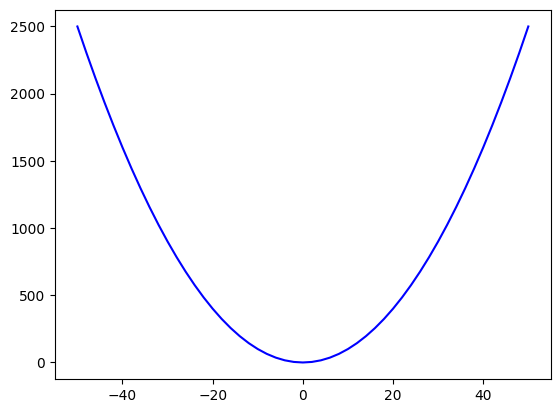

In [19]:
import matplotlib.pyplot as plt
X = np.arange(-50,51,2)
Y = X**2
plt.plot(X,Y,color = 'blue')
plt.show()

In [20]:
arr4 = np.random.rand(2,3)
arr4

array([[0.32684824, 0.3099381 , 0.63097756],
       [0.2819675 , 0.37453619, 0.52440707]])

In [21]:
arr5 = np.random.randint(10,size=(4,3))
arr5

array([[5, 4, 8],
       [0, 4, 1],
       [8, 3, 8],
       [1, 2, 6]])

In [22]:
np.sum(arr5, axis=0) # 按轴求和

array([14, 13, 23])

In [23]:
np.max(arr5, axis=0) # 按轴求最大值

array([8, 4, 8])

# Tensor

In [24]:
data = np.array([1,2])
torch.tensor(data, dtype=None, device=None,requires_grad=False)

tensor([1, 2], dtype=torch.int32)

In [25]:
torch.zeros(4,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [26]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [27]:
torch.rand(2,3)

tensor([[0.1201, 0.2772, 0.5755],
        [0.6349, 0.8134, 0.7000]])

In [28]:
torch.randn(3,3)

tensor([[-1.1845, -0.1251, -0.0880],
        [-1.7471, -1.4208, -0.4207],
        [-0.2245,  0.5628,  1.4253]])

## 相互转换

In [29]:
# list与tensor转换
a = [1,2,3,4]
b = torch.Tensor(a) # Tensor
c = b.numpy().tolist()
c

[1.0, 2.0, 3.0, 4.0]

In [30]:
# a = np.array((2,3))
# b = a.tolist()
# b
# c = np.array(b)
# c

In [31]:
# numpy与tensor转换
a = np.array([3,4])
A = torch.Tensor(a)
B = np.array(A)
B
# B[0] = 5

array([3., 4.], dtype=float32)

In [32]:
# tensor的形状,shape是属性
a = torch.zeros(2,3,5)
a.shape

torch.Size([2, 3, 5])

In [33]:
# tensor的形状,shape是方法
torch.Size([2,3,5])
a.size()

torch.Size([2, 3, 5])

In [34]:
# 统计元素数量
a.numel()

30

## 维度转换

In [35]:
# 矩阵转秩 (维度转换）
x = torch.rand(2,3,5)
x.shape

torch.Size([2, 3, 5])

In [36]:
# 维度交换permute
x = x.permute(2,1,0)
x.shape

torch.Size([5, 3, 2])

In [37]:
# 只能交换两个维度
x = x.transpose(1,0)
x.shape

torch.Size([3, 5, 2])

经过permute和transpose的tensor不再连续

## 形状变换

In [38]:
x = torch.randn(4, 4)
x.shape

torch.Size([4, 4])

In [39]:
x = x.view(2,8)
x.shape

torch.Size([2, 8])

In [40]:
#如果用上面不连续的tensor来变换会报错
x = x.permute(1,0)
x.shape

torch.Size([8, 2])

In [41]:
x.view(4, 4)

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [42]:
# 此时我们要用另一个函数
x = x.reshape(4,4)
x.shape

torch.Size([4, 4])

reshape 相当于进行了两步操作，先把 Tensor 在内存中捋顺了，然后再进行 view 操作

## 增维降维

squeeze:如果 dim 指定的维度的值为 1，则将该维度删除，若指定的维度
值不为 1，则返回原来的 Tensor。

In [43]:
x = torch.rand(2,1,3)
x.shape

torch.Size([2, 1, 3])

In [44]:
y = x.squeeze(1)
y.shape

torch.Size([2, 3])

In [45]:
z = y.squeeze(1)
z.shape

torch.Size([2, 3])

## tensor连接操作

cat 是 concatnate 的意思，也就是拼接、联系的意思。

In [46]:
A=torch.ones(3,3)
B=2*torch.ones(3,3)
A

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [47]:
B

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [48]:
C=torch.cat((A,B),0)
C

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [49]:
D=torch.cat((A,B),1)
D

tensor([[1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 2., 2., 2.]])

cat 实际上是将多个 Tensor 在已有的维度上进行连接，那如果想增加新的维度进行连接用stack

In [50]:
# 从二维变成三维
A=torch.arange(0,4)
A

tensor([0, 1, 2, 3])

In [51]:
B=torch.arange(5,9)
B

tensor([5, 6, 7, 8])

In [52]:
C=torch.stack((A,B),0)
C

tensor([[0, 1, 2, 3],
        [5, 6, 7, 8]])

In [53]:
D=torch.stack((A,B),1)
D

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8]])

## 运算

In [54]:
x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y 

(tensor([ 3,  4,  6, 10]),
 tensor([-1,  0,  2,  6]),
 tensor([ 2,  4,  8, 16]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1,  4, 16, 64]))

In [55]:
x == y

tensor([False,  True, False, False])

## 索引切片

In [56]:
t1 = torch.tensor([[1,3,4,6],[2,5,12,6],[4,2,7,12]])
t1
t1.shape

torch.Size([3, 4])

In [57]:
t1[-1], t1[1:3]

(tensor([ 4,  2,  7, 12]),
 tensor([[ 2,  5, 12,  6],
         [ 4,  2,  7, 12]]))

In [58]:
t1[1, 2] = 9
t1

tensor([[ 1,  3,  4,  6],
        [ 2,  5,  9,  6],
        [ 4,  2,  7, 12]])

In [59]:
# 赋同样的值
t1[0:2, :] = 12
t1

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 4,  2,  7, 12]])

In [60]:
# 节省内存,当执行+操作，会分配新的内存空间
t2 = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

In [61]:
before = id(t1)
t1 = t2 + t1
id(t1) == before

False

In [62]:
t3 = torch.zeros_like(t2)
print('id(t3):', id(t3))
t3[:] = t1 + t2
print('id(t3):', id(t3))

id(t3): 1709176320384
id(t3): 1709176320384


如果在后续计算中没有重复使用X， 我们也可以使用X[:] = X + Y或X += Y来减少操作的内存开销。

In [63]:
before = id(t1)
t1 += t2
id(t1) == before

True

## 广播机制

在某些情况下，即使形状不同，我们仍然可以通过调用 广播机制（broadcasting mechanism）来执行按元素操作

In [64]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [65]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])